In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [70]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pprint
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
cid = 'a1119903d13146df96d261140fa95698'
secret = '850988b88d784f0290577bd2fc5e25d8'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
result = sp.search("red velvet", limit=1, type='artist')
pprint.pprint(result)

# artist id : result['artist']['items'][0]['id']

{'artists': {'href': 'https://api.spotify.com/v1/search?query=red+velvet&type=artist&offset=0&limit=1',
             'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1z4g3DjTBBZKhvAroFlhOM'},
                        'followers': {'href': None, 'total': 6677726},
                        'genres': ['k-pop', 'k-pop girl group'],
                        'href': 'https://api.spotify.com/v1/artists/1z4g3DjTBBZKhvAroFlhOM',
                        'id': '1z4g3DjTBBZKhvAroFlhOM',
                        'images': [{'height': 640,
                                    'url': 'https://i.scdn.co/image/ab6761610000e5eb8a8415e72dedaa552259d0c1',
                                    'width': 640},
                                   {'height': 320,
                                    'url': 'https://i.scdn.co/image/ab676161000051748a8415e72dedaa552259d0c1',
                                    'width': 320},
                                   {'height': 160,
                      

In [7]:
class Spotify_audio_features:
    def __init__(self):
        # initial setting
        client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
        self.sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
        
    def get_features(self, song):
        # get track id information
        track_info = self.sp.search(q=song, type='track', market='JP')
        track_id = track_info["tracks"]["items"][0]["id"]

        # get audio_feature
        features = self.sp.audio_features(tracks=[track_id])
        acousticness = features[0]["acousticness"]
        danceability = features[0]["danceability"]
        energy = features[0]["energy"]
        liveness = features[0]["liveness"]
        loudness = features[0]["loudness"]
        valence = features[0]["valence"]
        mode = features[0]["mode"]

        result = {"acousticness" : acousticness,
                    "danceability" : danceability,
                    "energy" : energy,
                    "liveness" : liveness,
                    "loudness" : loudness,
                    "valence" : valence,
                    "mode" : mode}
        
        return result
    
# danceability : 춤 추기에 적합한가? 0.0 - 1.0 범위이며 값이 클 수록 춤추기 좋음.
# energy : 에너지의 정도. 0.0 - 1.0 번위이며 빠르고 화려하고 노이즈가 많은 음악일수록 값이 큽니다.
# instrumentlness : 노래에 보컬이 있는 정도입니다.(0.0 - 1.0)
# liveness : 노래의 라이브 정도를 나타냅니다. 라이브 음원일수록 값이 높겠지요?
# loudness : 소리의 화려함/큼 정도를 보여줍니다.(데시벨 값으로 보여준다고 하네요.)
# mode : major(장조) = 1, minor(단조) = 0 입니다.
# speechiness : 말하는 정도를 보여줍니다.
# tempo : 템포, beats per minute(BPM) 입니다.
# valence : 음원의 밝음 정도를 나타내줍니다. 밝고 행복하고 기쁘면 값이 높고 반대로 슬프고 화나고 우울하면 값이 낮다고.

In [44]:
saf = Spotify_audio_features()
song_title = "벚꽃엔딩"

In [45]:
feat = saf.get_features(song_title)
df = pd.DataFrame({
    'song': [song_title],
    'danceability': [feat['danceability']],
    'energy': [feat['energy']],
    'valence': [feat['valence']]
})
print(df)
# 특성을 잘 구분할 수 있는 feature 3개를 뽑음, 0~1정규화 되어있음

  song  danceability  energy  valence
0  아로하         0.529   0.754    0.538


In [ ]:
# 비지도학습을 위한 df 구성  https://www.tjmedia.com/tjsong/song_monthPopular.asp

In [54]:
song_list='''추억은만남보다이별에남아
밝게빛나는별이되어비춰줄게
신호등
오래된노래
좋니
꿈속에너
너의번호를누르고
포장마차
어디에도
축가
까만안경
Marry Me
응급실(쾌걸춘향OST)
소주한잔
체념
첫눈처럼너에게가겠다(도깨비OST)
사랑이식었다고말해도돼
Timeless
그대라는사치
사랑은늘도망가(신사와아가씨OST)
아로하(슬기로운의사생활OST)
스토커
그날에나는맘이편했을까
나를사랑했던사람아
지나오다
바라만본다
우리왜헤어져야해
시간을거슬러(낮에뜨는달 X 케이윌)
너였다면(또오해영OST)
곡예사
서툰이별을하려해
삭제
내손을잡아(최고의사랑OST)
너를만나
안아줘
모든날, 모든순간(Every Day, Every Moment)(키스먼저할까요? OST)
One Love
OHAYO MY NIGHT
홍연
Hello
조금취했어
그녀를사랑해줘요
취중고백
다시만날까봐
비와당신(슬기로운의사생활시즌2 OST)
사계(하루살이)
라라라
노래방에서
가시
그날처럼
가을안부
서면역에서
취기를빌려(취향저격그녀 X 산들)
오늘도빛나는너에게(To You My Light)
안녕(호텔델루나OST)
흔들리는꽃들속에서네샴푸향이느껴진거야(멜로가체질OST)
My Way(돈꽃OST)
너의모든순간(별에서온그대OST)
야생화
이미슬픈사랑
미친소리
형(兄)
광화문에서(At Gwanghwamun)
밤하늘의별을(2020)
술한잔해요
이소설의끝을다시써보려해
폰서트
VVS
뿌리
한숨
회전목마
Next Level
오르막길
찰나가영원이될때(The Eternal Moment)
내가저지른사랑
다정히내이름을부르면
Tears
신촌을못가
늦은밤너의집앞골목길에서
리무진
너, 너
호랑수월가(나와호랑이님OST)
선물
사랑에연습이있었다면
기다리다
바람기억
시간을거슬러(해를품은달OST)
롤린(Rollin')
호랑수월가
사실나는(남자 Ver.)
잠이오질않네요
사이렌 Remix
가을타나봐
매일듣는노래(A Daily Song)
기다릴게(공주의남자OST)
눈의꽃(미안하다사랑한다OST)
듣는편지
금지된사랑
사랑했나봐
가질수없는너'''

# 검색 오류 방지를 위한 1차 전처리
song_list = song_list.split('\n')
for i,song in enumerate(song_list):
    temp = song.split("(")
    song_list[i] = temp[0]
song_list=list(set(song_list))
                          

In [68]:
feat = saf.get_features('벚꽃엔딩')

df = pd.DataFrame({
    'song': [song_title],
    'danceability': [feat['danceability']],
    'energy': [feat['energy']],
    'valence': [feat['valence']]
})

for song_title in song_list:
    try:
        feat = saf.get_features(song_title)
    except:
        continue
    temp = {'song': song_title,
    'danceability': feat['danceability'],
    'energy': feat['energy'],
    'valence': feat['valence']}
    df = df.append(temp, ignore_index=True)

print(df)   

         song  danceability  energy  valence
0          안녕         0.621   0.669    0.663
1       Tears         0.612   0.677    0.523
2       노래방에서         0.599   0.648    0.723
3       가을타나봐         0.410   0.598    0.460
4        까만안경         0.344   0.456    0.150
..        ...           ...     ...      ...
77     밤하늘의별을         0.566   0.682    0.442
78         롤린         0.691   0.875    0.489
79  사이렌 Remix         0.742   0.540    0.520
80       가을안부         0.451   0.392    0.152
81         안녕         0.490   0.292    0.293

[82 rows x 4 columns]


In [69]:
df = df.set_index('song')
data_points = df.values

No handles with labels found to put in legend.


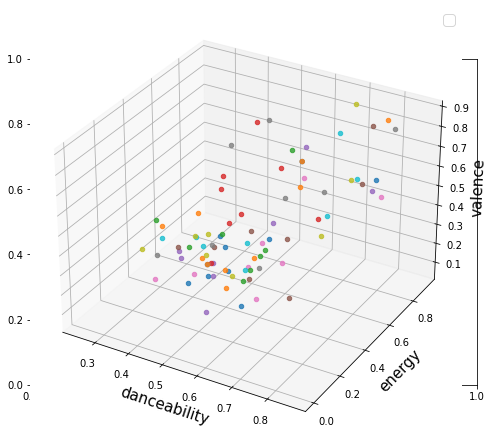

In [73]:
# 3개의 feature를 가진 노래 속성 3차원 시각화해서 분포 확인
fig = plt.figure(figsize = (8, 6)) 
plt.title("K_Clusters")
ax = Axes3D(fig) 

for i in df.index:
    ax.scatter(df["danceability"][i], df["energy"][i], df["valence"][i], alpha=.8,)#label=i,)
ax.set_xlabel('danceability', fontsize=15)
ax.set_ylabel('energy', fontsize=15)
ax.set_zlabel('valence', fontsize=15)
ax.legend(fontsize=15)
plt.show() 

In [80]:
# 클러스터 3개의 그룹
kmeans = KMeans(n_clusters=3).fit(data_points)
df['group'] = kmeans.labels_

df = df.sort_values(by='group' ,ascending=True)
pd.set_option('display.max_row', 100)

print(df)

                danceability   energy  valence  group
song                                                 
안녕                     0.490  0.29200   0.2930      0
My Way                 0.816  0.71900   0.6350      0
Next Level             0.820  0.85200   0.8200      0
OHAYO MY NIGHT         0.456  0.75600   0.7370      0
좋니                     0.254  0.53400   0.2250      0
비와당신                   0.399  0.50200   0.1670      0
밤하늘의별을                 0.566  0.68200   0.4420      0
오르막길                   0.366  0.51100   0.2380      0
기다리다                   0.625  0.51000   0.2400      0
까만안경                   0.344  0.45600   0.1500      0
호랑수월가                  0.647  0.34700   0.4730      0
기다릴게                   0.641  0.79300   0.4460      0
듣는편지                   0.486  0.32400   0.2810      0
미친소리                   0.678  0.40300   0.4560      0
내가저지른사랑                0.537  0.58000   0.2550      0
응급실                    0.579  0.37400   0.2170      0
취중고백                   0.562

In [77]:
# csv가 보기 편하니, 본인 경로에 맞게 저장
df.to_csv('C:/Users/Jun/Downloads/df.csv', encoding="utf-8-sig")